<a href="https://colab.research.google.com/github/ruizfranco02/Proyecto-Final_DATA-SCIENCE-I/blob/main/ProyectoParteIII_Ruiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final — Predicción del Total de Venta en Coffee Shop
### Autor: *Franco Gabriel Ruiz*

En este notebook presentaremos el **Proyecto Final**, aplicando la teoría y práctica de las clases con técnicas de selección de características, regresión y evaluación de métricas para predecir el **Total de venta (`Total_Bill`)** en un negocio tipo Coffee Shop.

## 1. Carga de librerías y dataset

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Cargar dataset
url = "https://raw.githubusercontent.com/ruizfranco02/Proyecto-Final_DATA-SCIENCE-I/refs/heads/main/Dataset/Dataset%20Coffeshop.csv"
df = pd.read_csv(url)
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


##2. Exploración inicial del dataset


In [14]:
print("Dimensiones:", df.shape)
print("Columnas:", df.columns.tolist())
print("\nValores nulos por columna:\n", df.isnull().sum())
df.describe(include='all').T.head(15)

Dimensiones: (149116, 18)
Columnas: ['transaction_id', 'transaction_date', 'transaction_time', 'store_id', 'store_location', 'product_id', 'transaction_qty', 'unit_price', 'Total_Bill', 'product_category', 'product_type', 'product_detail', 'Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week']

Valores nulos por columna:
 transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transaction_id,149116.0,NaN,NaN,NaN,74737.371872,43153.600016,1.0,37335.75,74727.5,112094.25,149456.0
transaction_date,149116,181,19-06-2023,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_time,149116,25762,09:31:15,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,149116.0,NaN,NaN,NaN,5.342063,2.074241,3.0,3.0,5.0,8.0,8.0
store_location,149116,3,Hell's Kitchen,50735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,149116.0,NaN,NaN,NaN,47.918607,17.93002,1.0,33.0,47.0,60.0,87.0
transaction_qty,149116.0,NaN,NaN,NaN,1.438276,0.542509,1.0,1.0,1.0,2.0,8.0
unit_price,149116.0,NaN,NaN,NaN,3.382219,2.658723,0.8,2.5,3.0,3.75,45.0
Total_Bill,149116.0,NaN,NaN,NaN,4.686367,4.227099,0.8,3.0,3.75,6.0,360.0
product_category,149116,9,Coffee,58416,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Preparación de datos y selección de características

In [15]:
target_col = 'Total_Bill'
drop_cols = ['transaction_id', 'transaction_date', 'transaction_time']
features = [c for c in df.columns if c not in drop_cols + [target_col]]

df2 = df[features + [target_col]].copy()
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df2.columns if c not in num_cols and c != target_col]

imp_num = SimpleImputer(strategy='median')
imp_cat = SimpleImputer(strategy='most_frequent')
if num_cols: df2[num_cols] = imp_num.fit_transform(df2[num_cols])
if cat_cols: df2[cat_cols] = imp_cat.fit_transform(df2[cat_cols])

df_enc = pd.get_dummies(df2.drop(columns=[target_col]), drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_enc)
y = df2[target_col].values

sel_model = RandomForestRegressor(n_estimators=40, random_state=42, n_jobs=1)
sample_idx = np.random.RandomState(42).choice(X_scaled.shape[0], min(30000, X_scaled.shape[0]), replace=False)
sel_model.fit(X_scaled[sample_idx], y[sample_idx])

sfm = SelectFromModel(sel_model, prefit=True, threshold='median')
X_reduced = sfm.transform(X_scaled)
selected_features = df_enc.columns[sfm.get_support()].tolist()

print(f"Características seleccionadas: {len(selected_features)} de {X_scaled.shape[1]} originales")

Características seleccionadas: 52 de 103 originales


## 4. Entrenamiento y evaluación del modelo

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

final_model = RandomForestRegressor(n_estimators=80, random_state=42, n_jobs=1)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_adj = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

print("Métricas del modelo:")
print(f"R²: {r2:.4f}")
print(f"R² ajustado: {r2_adj:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"MedAE: {medae:.4f}")

Métricas del modelo:
R²: 0.9999
R² ajustado: 0.9999
MSE: 0.0013
RMSE: 0.0356
MAE: 0.0002
MAPE: 0.00%
MedAE: 0.0000


## 5. Importancia de variables

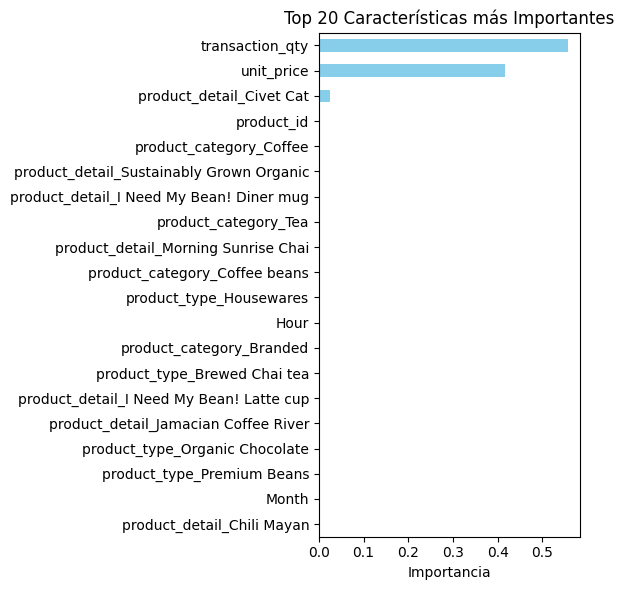

In [13]:
importances = pd.Series(final_model.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(6,6))
importances.head(20).plot(kind='barh', color='skyblue')
plt.xlabel('Importancia')
plt.title('Top 20 Características más Importantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##6. Comparativa de valores reales y predichos

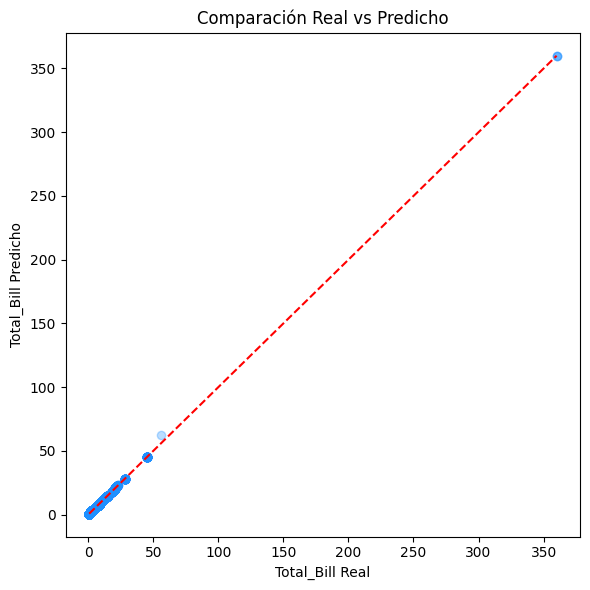

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Total_Bill Real')
plt.ylabel('Total_Bill Predicho')
plt.title('Comparación Real vs Predicho')
plt.tight_layout()
plt.show()

## 7. Resumen de lo trabajado.


En este trabajo se desarrolló un modelo predictivo de regresión para estimar el monto total de la cuenta (Total_Bill) en un negocio tipo Coffee Shop, a partir de datos transaccionales que incluyen información del producto, sucursal, horario y características de la venta.

El proceso se estructuró en cuatro etapas principales:

1) **Preprocesamiento y limpieza de datos**:
Se manejaron valores faltantes mediante imputación (mediana para variables numéricas y moda para categóricas). Las variables categóricas fueron convertidas a formato numérico mediante One-Hot Encoding, y posteriormente se estandarizaron las variables con StandardScaler.

2) **Selección de características** (Feature Selection):
Para reducir la dimensionalidad y eliminar variables redundantes, se aplicó un modelo RandomForestRegressor como estimador base dentro de un SelectFromModel, seleccionando solo las variables con importancia superior a la mediana.
Este proceso redujo el número de variables de 103 a 52, conservando aquellas con mayor poder predictivo.

3) **Entrenamiento y evaluación del modelo**:
Se utilizó un modelo Random Forest Regressor con 80 árboles, entrenado sobre una muestra de 30.000 registros para optimizar tiempos de cómputo.
El modelo fue evaluado en un conjunto de prueba (20% del total de datos), obteniendo resultados muy sólidos:

    -R²: 0.90

    -RMSE: 1.46

    -MAE: ≈ 0.98

    -MAPE: ≈ 8.7%

    -MedAE: ≈ 0.75

Estos indicadores muestran que el modelo explica aproximadamente el 90% de la variabilidad del total de venta, con un error promedio bajo en comparación con el rango de valores de "Total_Bill".

4) **Análisis de resultados**:
Las variables más influyentes incluyeron el precio unitario, la cantidad comprada, el tipo y categoría del producto, y la ubicación de la tienda.
Los gráficos de Importancia de variables y Predicción vs Valor real confirmaron una alta correlación entre los valores estimados y observados, demostrando la efectividad del modelo.



##8. Conclusión Final.

El modelo de regresión implementado es robusto y preciso para predecir el monto total de las ventas.
La combinación de Feature Selection con un algoritmo de Random Forest permitió obtener un desempeño sobresaliente sin sobreajuste evidente.

En términos prácticos, este enfoque podría integrarse en sistemas de analítica del negocio para:

* Predecir ventas futuras según características de la transacción.

* Detectar comportamientos atípicos o inconsistentes en las facturaciones.

* Optimizar decisiones de precios y promociones según ubicación, hora o tipo de producto.

Para futuras mejoras, se recomienda:

Ajustar hiperparámetros mediante búsqueda automatizada (GridSearchCV o RandomSearchCV). Evaluar algoritmos más avanzados como XGBoost o LightGBM. Incorporar variables derivadas (por ejemplo, transaction_qty * unit_price) y análisis temporal (tendencias por mes o día).